In [2]:
import torch
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import sys
sys.path.insert(0, 'Pytorch-UNet')
sys.path.insert(0, 'utils')
from plotting_utils import plot_pytorch_images, make_grid
from misc import merge
from unet.unet_model import UNet
from torch.nn import functional as F
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torchvision
torch.manual_seed(0);

In [10]:
model_32_64 = torch.load('unet_mask_32_64', map_location={'cuda:0': 'cpu'})


model_64_128 = torch.load('unet_mask_64_128', map_location={'cuda:0': 'cpu'})
# model_64_128.to(1);

model_128_256 = torch.load('unet_mask_128_256', map_location={'cuda:1': 'cpu'})
# model_128_256.to(0);


# vae = torch.load('VAE_10K_32_HQ')
# vae.to(0);

In [11]:
dataroot="/hdd/imagenet/10c/"
num_datapoints = 10000
validation_size = 1000
num_samples = num_datapoints + validation_size

full_dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(256),
                               transforms.CenterCrop(256),
                               transforms.ToTensor()
                           ]))
print(full_dataset)
# torch_data_loader = torch.utils.data.DataLoader(full_dataset, batch_size=32, shuffle=True, num_workers=4, drop_last=True)


torch_dataset,torch_val_dataset,_ = torch.utils.data.random_split(full_dataset, [num_datapoints,validation_size,full_dataset.__len__()-num_samples])
torch_data_loader = torch.utils.data.DataLoader(torch_dataset, batch_size=32, shuffle=False, num_workers=4, drop_last=True)
torch_val_data_loader = torch.utils.data.DataLoader(torch_val_dataset, batch_size=32, drop_last=True, shuffle=False)

Dataset ImageFolder
    Number of datapoints: 11593
    Root location: /hdd/imagenet/10c/
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(256, 256))
               ToTensor()
           )


# Three UNETS 

1. 32->64
2. 64->128
3. 128->256

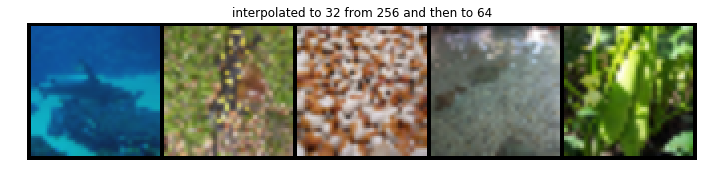

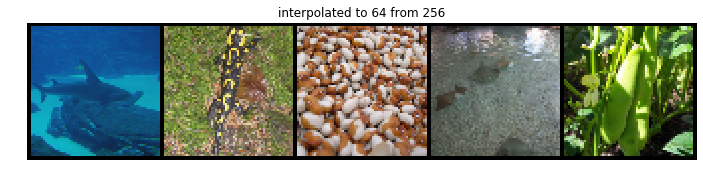

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


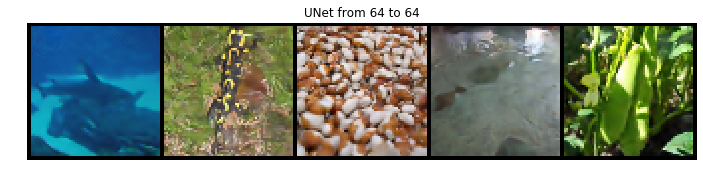

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


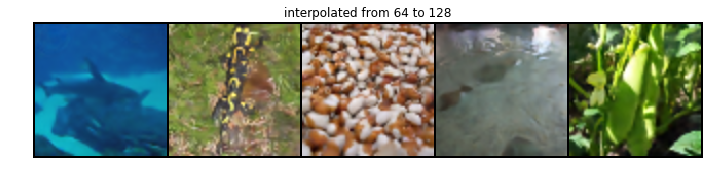

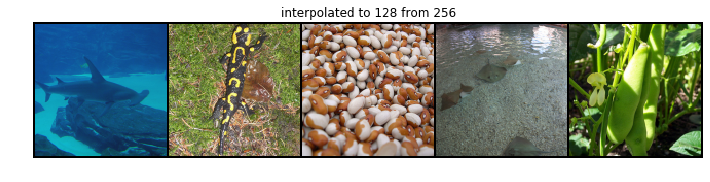

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


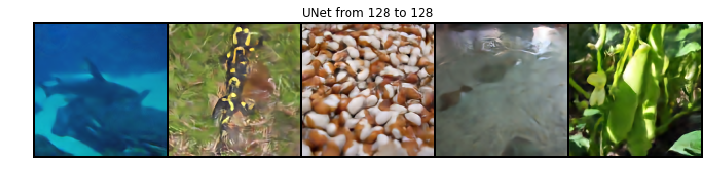

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


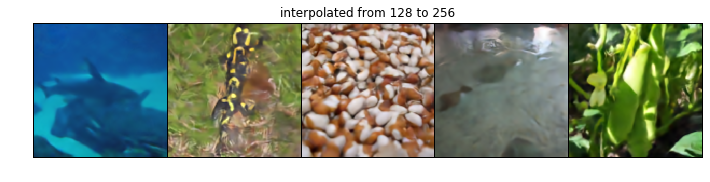

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


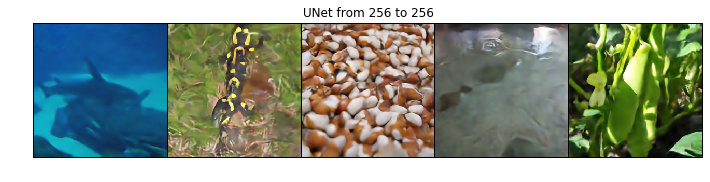

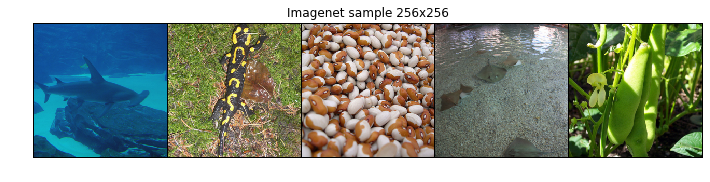

In [19]:
data_loader = torch_data_loader
np.random.seed(0)
random_idx = np.random.randint(len(data_loader.dataset)) - 5
x = torch.stack([data_loader.dataset[idx][0] for idx in range(random_idx,random_idx+5)])

y = F.interpolate(F.interpolate(x, 32, mode="bilinear"), 64, mode="bilinear")
make_grid(y[0:5],title="interpolated to 32 from 256 and then to 64");
x_mask_hat = model_32_64(y)
x_hat = y + x_mask_hat
make_grid(F.interpolate(x, 64, mode="bilinear")[0:5], title="interpolated to 64 from 256")
make_grid(x_hat[0:5], title="UNet from 64 to 64");

y = F.interpolate(x_hat, 128, mode="bilinear")
make_grid(y[0:5],title="interpolated from 64 to 128");
x_mask_hat = model_64_128(y)
x_hat = y + x_mask_hat
make_grid(F.interpolate(x, 128, mode="bilinear")[0:5], title="interpolated to 128 from 256")
make_grid(x_hat[0:5], title="UNet from 128 to 128");


y = F.interpolate(x_hat, 256, mode="bilinear")
make_grid(y[0:5], title="interpolated from 128 to 256");
x_mask_hat = model_128_256(y)
x_hat_final = y + x_mask_hat
make_grid(x_hat_final[0:5], title="UNet from 256 to 256");
make_grid(x[0:5], title="Imagenet sample 256x256");

# Two UNETS 

1. 64->128
2. 128->256

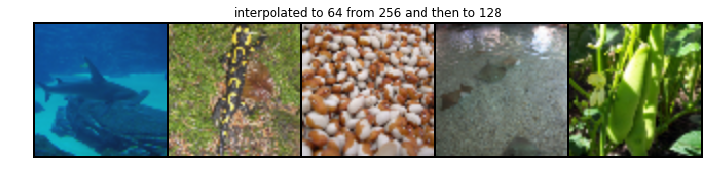

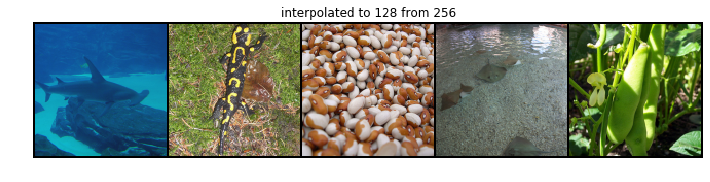

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


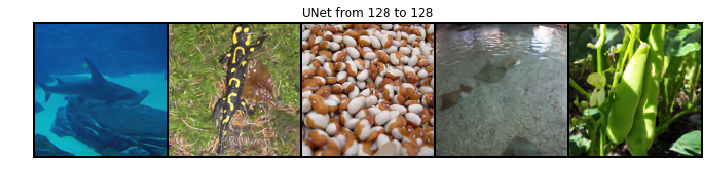

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


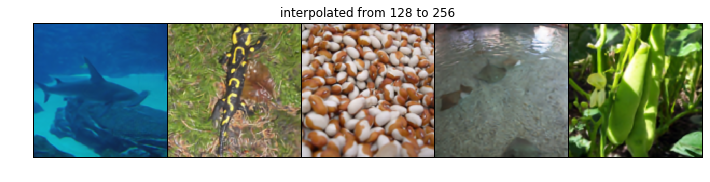

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


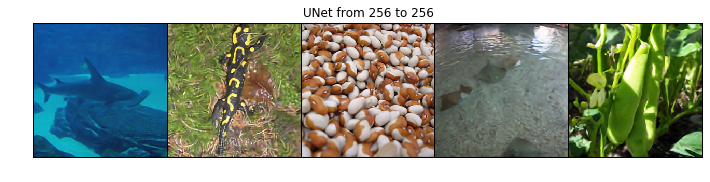

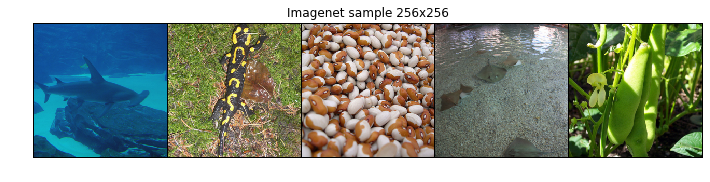

In [20]:
data_loader = torch_data_loader
np.random.seed(0)
random_idx = np.random.randint(len(data_loader.dataset)) - 5
x = torch.stack([data_loader.dataset[idx][0] for idx in range(random_idx,random_idx+5)])

y = F.interpolate(F.interpolate(x, 64, mode="bilinear"), 128, mode="bilinear")
make_grid(y[0:5],title="interpolated to 64 from 256 and then to 128");
x_mask_hat = model_64_128(y)
x_hat = y + x_mask_hat
make_grid(F.interpolate(x, 128, mode="bilinear")[0:5], title="interpolated to 128 from 256")
make_grid(x_hat[0:5], title="UNet from 128 to 128");


y = F.interpolate(x_hat, 256, mode="bilinear")
make_grid(y[0:5], title="interpolated from 128 to 256");
x_mask_hat = model_128_256(y)
x_hat_final = y + x_mask_hat
make_grid(x_hat_final[0:5], title="UNet from 256 to 256");
make_grid(x[0:5], title="Imagenet sample 256x256");

# One UNET

1. 128->256

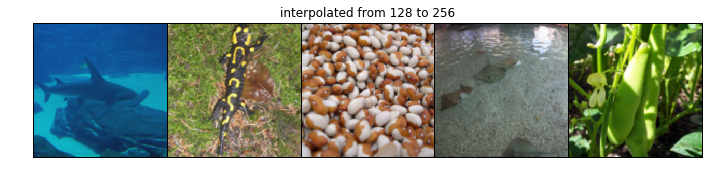

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


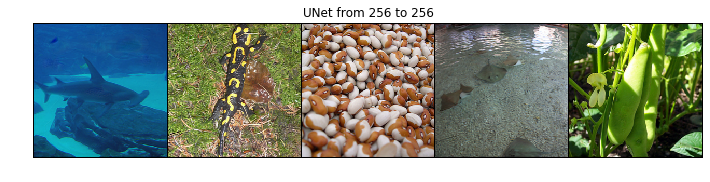

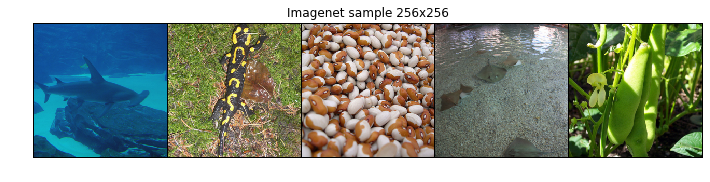

In [21]:
data_loader = torch_data_loader
np.random.seed(0)
random_idx = np.random.randint(len(data_loader.dataset)) - 5
x = torch.stack([data_loader.dataset[idx][0] for idx in range(random_idx,random_idx+5)])
y = F.interpolate(F.interpolate(x, 128, mode="bilinear"), 256, mode="bilinear")
# y = F.interpolate(x_hat, 256, mode="bilinear")
make_grid(y[0:5], title="interpolated from 128 to 256");
x_mask_hat = model_128_256(y)
x_hat_final = y + x_mask_hat
make_grid(x_hat_final[0:5], title="UNet from 256 to 256");
make_grid(x[0:5], title="Imagenet sample 256x256");